# Data

https://www.kaggle.com/crawford/emnist

## Load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf


train = pd.read_csv('emnist/emnist-balanced-train.csv', header=None)
#train = pd.read_csv('emnist-digits-train.csv', header=None)

test = pd.read_csv('emnist/emnist-balanced-test.csv', header=None)
#test = pd.read_csv('emnist-digits-test.csv', header=None)

#train.head()

# Number of Train
numTrain = len(train)
# Number of Test
numTest = len(test)
# Number of Classes
numClasses = len(train[0].unique())

train_data = train.iloc[:, 1:]
train_labels = train.iloc[:, 0]
test_data = test.iloc[:, 1:]
test_labels = test.iloc[:, 0]

# one-hot encoding
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
#train_labels.head()

train_data = train_data.values
train_labels = train_labels.values
test_data = test_data.values
test_labels = test_labels.values
#del train, test


rand = random.randint(0, numTrain - 1)


plt.imshow(
	train_data[rand].reshape([28, 28]), 
	cmap='Greys'
	)
plt.show()


def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)/255
test_data = np.apply_along_axis(rotate, 1, test_data)/255


plt.imshow(
	train_data[rand].reshape([28, 28]), 
	cmap='Greys'
	)
plt.show()



<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [14]:
tf.set_random_seed(777)  # for reproducibility


tf.reset_default_graph()

# EMNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 47 classes: 10 digits, 26 letters, and 11 capital letters 
Y = tf.placeholder(tf.float32, [None, numClasses])

A given data have 28*28 image. So we need 784. Also, the data we are currently using has 47 classes, which includes 10 digits (0~9), 26 letters, and 11 capital letters.

In [8]:
W = tf.Variable(tf.random_normal([784, numClasses]))
b = tf.Variable(tf.random_normal([numClasses]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


Multinomial Classfication
$$
W = 
\begin{bmatrix}
    w_{11} & w_{12} & \dots & w_{1n} \\
    w_{21} & w_{22} & \dots & w_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{n1} & w_{n2} & \dots & w_{nn}
\end{bmatrix}
$$

$$
X = 
\begin{bmatrix}
    x_{1} \\
    x_{2} \\
    \vdots \\
    x_{n}
\end{bmatrix}
$$

Softmax
$$
S(y_i) = \frac{e^y_i} {\sum_j e^y_i}
$$

In sum, let's suppose y = XW
$$
XW = y  => \frac{e^y_i} {\sum_j e^y_i} => Probabilities
$$

This is Softmax on Tensorflow. 
softmax(tf.matmul(X, W) + b).
So, tf.nn.softmax computes softmax activations. We can say that 
$$
softmax = \frac{exp(logits)} {reduce_sum(exp(logits), dim)}
$$

$$
cost(W) = -\frac {1} {m} \sum ylog(H(x)) + (1-y)log(1-H(x)) 
$$

In [9]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

$$
W = W -\alpha \frac{\partial}{\partial W} cost(W)
$$

In [10]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [11]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [12]:
# parameters
num_epochs = 20
batch_size = 100
num_iterations = int( numTrain / batch_size)

epoch = one forward pass and one backward pass of all the training examples


batch size = Number of training examples in one forward/backward pass. The higher the batch size is, the more memory space you'll need is

Number of iterations = number of passes, each pass using batch size number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Epoch: 0001, Cost: 7.535348112
Epoch: 0002, Cost: 3.600892323
Epoch: 0003, Cost: 2.895812646
Epoch: 0004, Cost: 2.544323784
Epoch: 0005, Cost: 2.325526564
Epoch: 0006, Cost: 2.173207242
Epoch: 0007, Cost: 2.059379699
Epoch: 0008, Cost: 1.970048657
Epoch: 0009, Cost: 1.897403872
Epoch: 0010, Cost: 1.836728343
Epoch: 0011, Cost: 1.785000423
Epoch: 0012, Cost: 1.740186279
Epoch: 0013, Cost: 1.700859137
Epoch: 0014, Cost: 1.665982329
Epoch: 0015, Cost: 1.634779895
Epoch: 0016, Cost: 1.606655899
Epoch: 0017, Cost: 1.581142828
Epoch: 0018, Cost: 1.557867535
Epoch: 0019, Cost: 1.536527669
Epoch: 0020, Cost: 1.516875225
Learning finished
Accuracy:  0.60835105
Label:  [34]
Prediction:  [31]


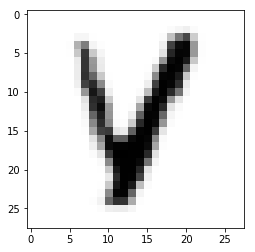

In [13]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = train_data[i * 100: (i + 1) * 100], train_labels[i * 100: (i + 1) * 100]
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: test_data, Y: test_labels}
        ),
    )

    # Get Label and predict
    r = random.randint(0, numTest - 1)
    print("Label: ", sess.run(tf.argmax(test_labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_data[r : r + 1]}),
    )

    plt.imshow(
        test_data[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

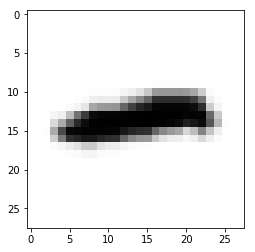

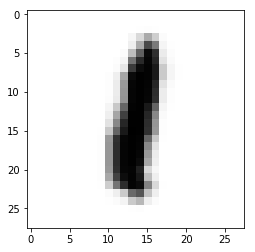

Epoch: 0001, Cost: 7.547921529
Epoch: 0002, Cost: 3.549412508
Epoch: 0003, Cost: 2.870119521
Epoch: 0004, Cost: 2.537144286
Epoch: 0005, Cost: 2.327276375
Epoch: 0006, Cost: 2.178609756
Epoch: 0007, Cost: 2.065841219
Epoch: 0008, Cost: 1.976394502
Epoch: 0009, Cost: 1.903183774
Epoch: 0010, Cost: 1.841836590
Epoch: 0011, Cost: 1.789477016
Epoch: 0012, Cost: 1.744119655
Epoch: 0013, Cost: 1.704340942
Epoch: 0014, Cost: 1.669089417
Epoch: 0015, Cost: 1.637570259
Epoch: 0016, Cost: 1.609170834
Epoch: 0017, Cost: 1.583410778
Epoch: 0018, Cost: 1.559907521
Epoch: 0019, Cost: 1.538352199
Epoch: 0020, Cost: 1.518492334
Learning finished
Accuracy:  0.6109043
Label:  [7]
Prediction:  [7]


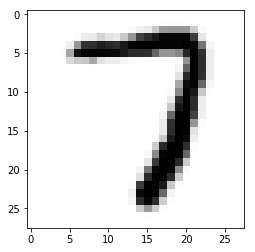

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf


train = pd.read_csv('emnist/emnist-balanced-train.csv', header=None)
#train = pd.read_csv('emnist-digits-train.csv', header=None)

test = pd.read_csv('emnist/emnist-balanced-test.csv', header=None)
#test = pd.read_csv('emnist-digits-test.csv', header=None)

#train.head()

# Number of Train
numTrain = len(train)
# Number of Test
numTest = len(test)
# Number of Classes
numClasses = len(train[0].unique())

train_data = train.iloc[:, 1:]
train_labels = train.iloc[:, 0]
test_data = test.iloc[:, 1:]
test_labels = test.iloc[:, 0]

# one-hot encoding
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
#train_labels.head()

train_data = train_data.values
train_labels = train_labels.values
test_data = test_data.values
test_labels = test_labels.values
#del train, test


rand = random.randint(0, numTrain - 1)


plt.imshow(
	train_data[rand].reshape([28, 28]), 
	cmap='Greys'
	)
plt.show()


def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)/255
test_data = np.apply_along_axis(rotate, 1, test_data)/255


plt.imshow(
	train_data[rand].reshape([28, 28]), 
	cmap='Greys'
	)
plt.show()


tf.set_random_seed(777)  # for reproducibility

#numClasses = 10
#numClasses = 47

tf.reset_default_graph()

# EMNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 47 classes: 10 digits, 26 letters, and 11 capital letters 
Y = tf.placeholder(tf.float32, [None, numClasses])

W = tf.Variable(tf.random_normal([784, numClasses]))
b = tf.Variable(tf.random_normal([numClasses]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 20
batch_size = 100
num_iterations = int( numTrain / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = train_data[i * 100: (i + 1) * 100], train_labels[i * 100: (i + 1) * 100]
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: test_data, Y: test_labels}
        ),
    )

    # Get Label and predict
    r = random.randint(0, numTest - 1)
    print("Label: ", sess.run(tf.argmax(test_labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_data[r : r + 1]}),
    )

    plt.imshow(
        test_data[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

### Reference

Gregory Cohen, Saeed Afshar, Jonathan Tapson, and Andre ́ van Schaik, "EMNIST: an extension of MNIST to handwritten letters", March 2017